In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Data
weight = 0.3
bias = 0.9

start = 0
end = 2
step = 0.02

X = torch.arange(start, end, step)
Y = weight*X + bias

X[:10], Y[:10]

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800]),
 tensor([0.9000, 0.9060, 0.9120, 0.9180, 0.9240, 0.9300, 0.9360, 0.9420, 0.9480,
         0.9540]))

In [5]:
# train test split
train_split = int(0.8 * len(X))

x_train, y_train = X[:train_split], Y[:train_split]
x_test, y_test = X[train_split:], Y[train_split:]

len(x_train), len(y_train), len(x_test), len(y_test)

(80, 80, 20, 20)

In [7]:
# visualization
def plot_prediction(x_trn = x_train, y_trn = y_train, x_tt = x_test, y_tt = y_test, prediction = None):
  plt.figure(figsize = (10,8))
  plt.scatter(x_trn, y_trn, c='b', s=5, label="Traning Data")
  plt.scatter(x_tt, y_tt, c='g', s=5, label="Testing Data")

  if prediction is not None:
    plt.scatter(x_tt, prediction, c='r', s=5, label="Predict Data")

  plt.title("Train and Testing Visulization")
  plt.xlabel("Data")
  plt.ylabel("Label")
  plt.legend(prop = {"size" : 15})
  plt.show()

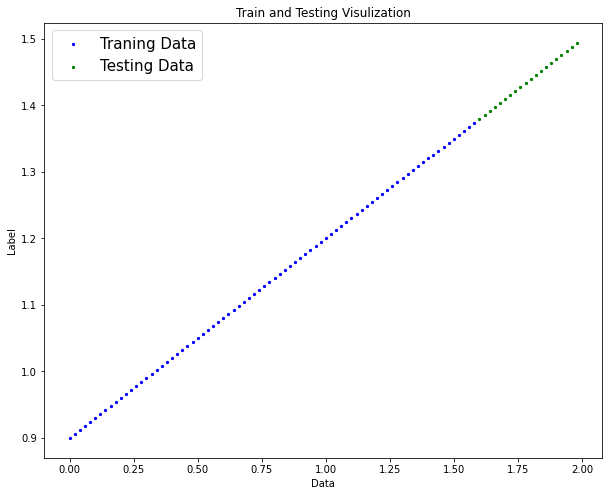

In [8]:
plot_prediction()

In [15]:
# device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [18]:
# create model
class LinearRegressionEx(nn.Module):
  def __init__(self):
    super().__init__()

    self.weight = nn.Parameter(torch.randn(1, requires_grad= True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad = True, dtype=torch.float))

  def forward(self, x : torch.Tensor) -> torch.Tensor:
    return self.weight*x + self.bias

torch.manual_seed(42)
model_ex = LinearRegressionEx()
model_ex, model_ex.state_dict()

(LinearRegressionEx(),
 OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))]))

In [19]:
# create loss and optimizer
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_ex.parameters(), lr = 0.01)

In [20]:
if device == 'cuda':
  model_ex = model_ex.to(device)
  x_train = x_train.to(device)
  x_test = x_test.to(device)
  y_train = y_train.to(device)
  y_test = y_test.to(device)

In [22]:
# traning
epoches = 300

epoch_values = []
loss_values = []
test_loss_values = []

torch.manual_seed(42)
for epoch in range(0,epoches):
  # train
  model_ex.train()

  # 1.Forward Step
  y_pred = model_ex.forward(x_train)

  # 2. loss
  loss = loss_fn(y_pred, y_train)

  # 3. optimizer xero grad
  optimizer.zero_grad()

  # 4. Backward step
  loss.backward()

  # 5. gradient
  optimizer.step()


  # testing
  model_ex.eval()
  with torch.inference_mode():
    test_pred = model_ex(x_test)

  test_loss = loss_fn(test_pred, y_test)

  if epoch % 20 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

  epoch_values.append(epoch)
  loss_values.append(loss)
  test_loss_values.append(test_loss)

Epoch: 0 | Loss: 0.7422052025794983 | Test loss: 0.6813738942146301
Epoch: 20 | Loss: 0.41738519072532654 | Test loss: 0.1985538750886917
Epoch: 40 | Loss: 0.16582420468330383 | Test loss: 0.19161489605903625
Epoch: 60 | Loss: 0.13492025434970856 | Test loss: 0.2436906397342682
Epoch: 80 | Loss: 0.11619293689727783 | Test loss: 0.2253524363040924
Epoch: 100 | Loss: 0.09796369075775146 | Test loss: 0.19259914755821228
Epoch: 120 | Loss: 0.07977813482284546 | Test loss: 0.156447634100914
Epoch: 140 | Loss: 0.061592668294906616 | Test loss: 0.12029661238193512
Epoch: 160 | Loss: 0.04340718686580658 | Test loss: 0.08482521772384644
Epoch: 180 | Loss: 0.025222454220056534 | Test loss: 0.04867418482899666
Epoch: 200 | Loss: 0.007037716452032328 | Test loss: 0.012523150071501732
Epoch: 220 | Loss: 0.010932961478829384 | Test loss: 0.006088173482567072
Epoch: 240 | Loss: 0.010932961478829384 | Test loss: 0.006088173482567072
Epoch: 260 | Loss: 0.010932961478829384 | Test loss: 0.00608817348256

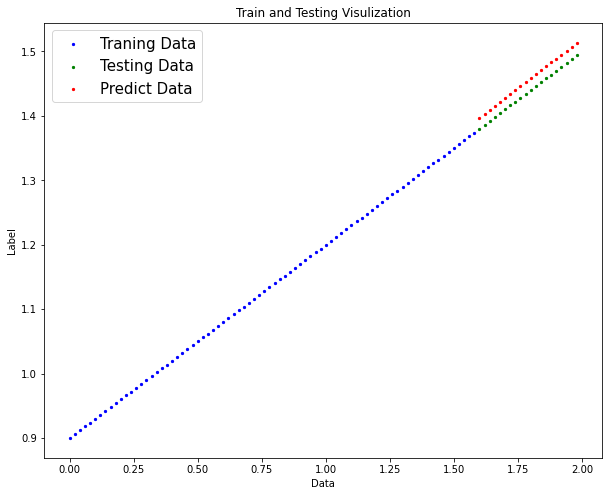

In [23]:
plot_prediction(prediction = test_pred)

In [24]:
model_ex.state_dict()

OrderedDict([('weight', tensor([0.3071])), ('bias', tensor([0.9053]))])

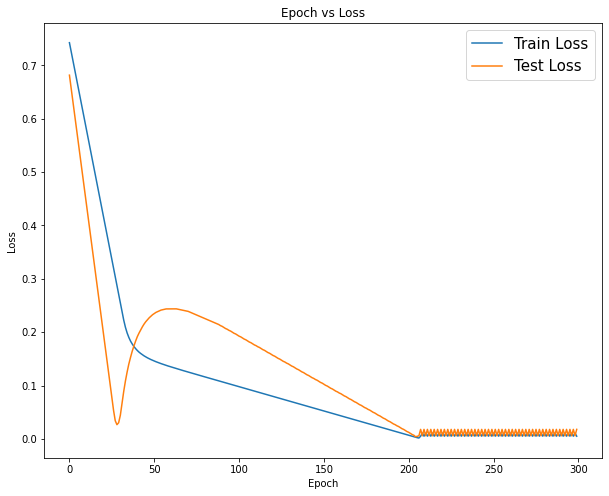

In [27]:
plt.figure(figsize = (10,8))
plt.plot(epoch_values, torch.tensor(loss_values).cpu().numpy(), label="Train Loss")
plt.plot(epoch_values, torch.tensor(test_loss_values).cpu().numpy(), label="Test Loss")
plt.title("Epoch vs Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(prop = {"size" : 15})
plt.show()

In [31]:
# save model
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

MODEL_NAME = "01_Reg_Ex.pth"
MODEL_PATH_SAVE = MODEL_PATH / MODEL_NAME

print(f"model saved at: {MODEL_PATH_SAVE}")
torch.save(obj = model_ex.state_dict(), f = MODEL_PATH_SAVE)

model saved at: models/01_Reg_Ex.pth


In [32]:
# load models

load_model_ex = LinearRegressionEx()

load_model_ex.load_state_dict(torch.load(f = MODEL_PATH_SAVE))

load_model_ex.state_dict()

OrderedDict([('weight', tensor([0.3071])), ('bias', tensor([0.9053]))])

In [33]:
# load checking
with torch.inference_mode():
  load_pred = load_model_ex(x_test)

load_pred == test_pred

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True])